- Usar o algorithmo Isolation Forest ( IF ) para identificar comportamentos outliers no dataset de dívidas
- Hipótese : um comportamento outlier pode indicar um usuário de alto risco/fraudulento

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("../tabelas/dataset_modelo_201904.xlsx")

In [4]:
df.head()

,cnpj,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,outros,processos,dispersao
0,178663000281,75.183043,17,6.497006,1134,0.226849,0.299252,0.151041,0.322858,0.0
1,225356000123,0.014977,0,0.000000,1793,0.000000,0.000000,1.000000,0.000000,0.0
2,265954000207,0.004024,0,0.000000,73,0.000000,0.000000,1.000000,0.000000,0.0
3,272073000302,0.070784,0,48.600000,320,0.000000,0.000000,1.000000,0.000000,0.0
4,437101000124,1.436143,0,31.666667,283,0.972151,0.000000,0.027849,0.000000,0.0


In [5]:
df.shape

(718, 10)

In [6]:
df.index = df.cnpj

In [7]:
df.drop(columns=['cnpj'], axis=1, inplace=True)

In [8]:
df.head()

,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,outros,processos,dispersao
cnpj,,,,,,,,,
178663000281,75.183043,17,6.497006,1134,0.226849,0.299252,0.151041,0.322858,0.0
225356000123,0.014977,0,0.000000,1793,0.000000,0.000000,1.000000,0.000000,0.0
265954000207,0.004024,0,0.000000,73,0.000000,0.000000,1.000000,0.000000,0.0
272073000302,0.070784,0,48.600000,320,0.000000,0.000000,1.000000,0.000000,0.0
437101000124,1.436143,0,31.666667,283,0.972151,0.000000,0.027849,0.000000,0.0


#### Distributions of the variables

In [9]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

-  prop_divida

In [10]:
trace = go.Histogram(
    x = df['prop_divida'],
    marker = dict(color='rgb(88,190,148)')
)
layout = go.Layout(title = "prop_divida")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

- quantidade_cheques

In [11]:
trace = go.Histogram(
    x = df['quantidade_cheques'],
    marker = dict(color='rgb(88,190,148)')
)
layout = go.Layout(title = "quantidade_cheques")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

- tempo_medio

In [12]:
trace = go.Histogram(
    x = df['tempo_medio'],
    marker = dict(color='rgb(88,190,148)')
)
layout = go.Layout(title = "tempo_medio")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

- idade_maxima

In [13]:
trace = go.Histogram(
    x = df['idade_maxima'],
    marker = dict(color='rgb(88,190,148)'),
    xbins=dict(
        start=df['idade_maxima'].min(),
        end=df['idade_maxima'].max(),
        size=10
    )
)
layout = go.Layout(title = "idade_maxima")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

- credito

In [14]:
trace = go.Histogram(
    x = df['credito'],
    marker = dict(color='rgb(88,190,148)'),
    xbins = dict(
        start = df['credito'].min(),
        end = df['credito'].max(),
        size = 0.05
    )
)

layout = go.Layout(title = "credito")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

- infra

In [15]:
trace = go.Histogram(
    x = df['infra'],
    marker = dict(color='rgb(88,190,148)')
)
layout = go.Layout(title = "infra")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

- outros

In [16]:
trace = go.Histogram(
    x = df['outros'],
    marker = dict(color='rgb(88,190,148)'),
    xbins = dict(
        start = df['outros'].min(),
        end = df['outros'].max(),
        size=0.02
    )
)
layout = go.Layout(title = "outros")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

- processos

In [17]:
trace = go.Histogram(
    x = df['processos'],
    marker = dict(color='rgb(88,190,148)'),
    xbins = dict(
        start = df['processos'].min(),
        end = df['processos'].max(),
        size = 0.05
    )
)
layout = go.Layout(title = "processos")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

- dispersao

In [18]:
trace = go.Histogram(
    x = df['dispersao'],
    marker = dict(color='rgb(88,190,148)'),
)
layout = go.Layout(title = "dispersao")
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

#### Outlier detection with the entire set of variables

In [19]:
X = df.copy()

outlier_detect =  IsolationForest(n_estimators=100,
                                 max_samples=1000, contamination=.05, max_features=X.shape[1], random_state=1)

outlier_detect.fit(X)

outliers_predicted = outlier_detect.predict(X)

df["outlier"] = outliers_predicted

df[df['outlier']==-1]

In [23]:
X.head()

,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,outros,processos,dispersao
cnpj,,,,,,,,,
178663000281,75.183043,17,6.497006,1134,0.226849,0.299252,0.151041,0.322858,0.0
225356000123,0.014977,0,0.000000,1793,0.000000,0.000000,1.000000,0.000000,0.0
265954000207,0.004024,0,0.000000,73,0.000000,0.000000,1.000000,0.000000,0.0
272073000302,0.070784,0,48.600000,320,0.000000,0.000000,1.000000,0.000000,0.0
437101000124,1.436143,0,31.666667,283,0.972151,0.000000,0.027849,0.000000,0.0


- var idade_maxima has a nearly uniform distribution, it will not define an outlier

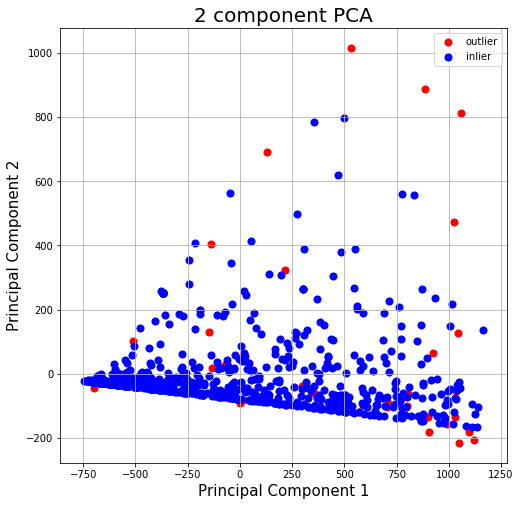

In [24]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

df_pca = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

df_pca["outlier"] = outliers_predicted

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["outlier", "inlier"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['outlier'] == -1 if target == "outlier" else df_pca['outlier'] == 1
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
               , df_pca.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


- dropping the var idae_maxima

In [47]:
X = df.drop(columns=["idade_maxima", "outlier"])

In [48]:
# X.drop(columns=["outlier"], axis=1, inplace=True)

In [49]:
# X.drop(columns=['outros'], axis=1, inplace=True)

In [50]:
X.head()

,prop_divida,quantidade_cheques,tempo_medio,credito,infra,outros,processos,dispersao
cnpj,,,,,,,,
178663000281,75.183043,17,6.497006,0.226849,0.299252,0.151041,0.322858,0.0
225356000123,0.014977,0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
265954000207,0.004024,0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
272073000302,0.070784,0,48.600000,0.000000,0.000000,1.000000,0.000000,0.0
437101000124,1.436143,0,31.666667,0.972151,0.000000,0.027849,0.000000,0.0


In [51]:
X.shape

(718, 8)

In [52]:
X = X[X['prop_divida']<1.5]

In [53]:
X.head()

,prop_divida,quantidade_cheques,tempo_medio,credito,infra,outros,processos,dispersao
cnpj,,,,,,,,
225356000123,0.014977,0,0.000000,0.000000,0.0,1.000000,0.0,0.0
265954000207,0.004024,0,0.000000,0.000000,0.0,1.000000,0.0,0.0
272073000302,0.070784,0,48.600000,0.000000,0.0,1.000000,0.0,0.0
437101000124,1.436143,0,31.666667,0.972151,0.0,0.027849,0.0,0.0
661205000118,1.232820,0,0.000000,1.000000,0.0,0.000000,0.0,0.0


In [54]:
# X.drop(columns=['outlier'], axis=1, inplace=True)

In [55]:
X.head()

,prop_divida,quantidade_cheques,tempo_medio,credito,infra,outros,processos,dispersao
cnpj,,,,,,,,
225356000123,0.014977,0,0.000000,0.000000,0.0,1.000000,0.0,0.0
265954000207,0.004024,0,0.000000,0.000000,0.0,1.000000,0.0,0.0
272073000302,0.070784,0,48.600000,0.000000,0.0,1.000000,0.0,0.0
437101000124,1.436143,0,31.666667,0.972151,0.0,0.027849,0.0,0.0
661205000118,1.232820,0,0.000000,1.000000,0.0,0.000000,0.0,0.0


In [57]:
outlier_detect =  IsolationForest(n_estimators=100,
                                 max_samples=1000, contamination=.04, max_features=X.shape[1], random_state=1)

outlier_detect.fit(X)

outliers_predicted = outlier_detect.predict(X)

In [58]:
X["outlier"] = outliers_predicted

In [59]:
X[X['outlier']==-1]

,prop_divida,quantidade_cheques,tempo_medio,credito,infra,outros,processos,dispersao,outlier
cnpj,,,,,,,,,
1912183000184,1.366010,13,138.833333,0.907560,0.000000,0.092440,0.000000,0.00,-1
2668113000195,1.013675,4,631.500000,0.175079,0.000000,0.000000,0.824921,0.00,-1
4160069000133,0.269228,0,1135.000000,0.804122,0.000000,0.195878,0.000000,0.00,-1
4247535000112,0.005878,13,973.000000,0.000000,0.269671,0.730329,0.000000,0.00,-1
5337303000118,0.145531,0,472.000000,0.000000,0.000000,0.000000,1.000000,0.00,-1
8792013000152,0.293338,12,117.250000,0.000000,0.000000,0.146112,0.853888,0.00,-1
9444087000160,0.270305,0,25.000000,0.909526,0.000000,0.090474,0.000000,0.25,-1
10394263000186,0.443386,0,637.000000,0.000000,0.000000,1.000000,0.000000,0.25,-1
10532480000195,1.027975,21,113.000000,0.000000,0.000000,0.242942,0.757058,0.00,-1


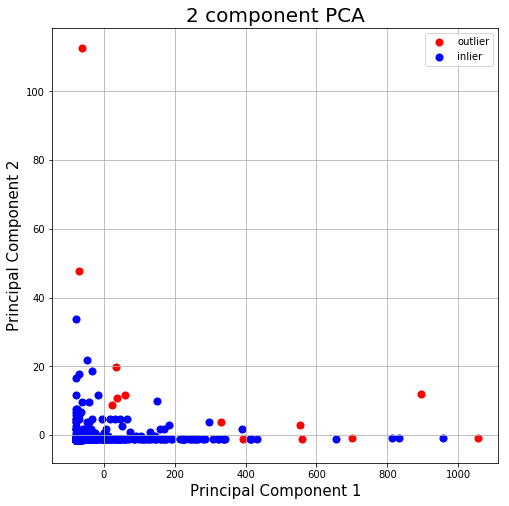

In [60]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

df_pca = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

df_pca["outlier"] = outliers_predicted

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["outlier", "inlier"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['outlier'] == -1 if target == "outlier" else df_pca['outlier'] == 1
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
               , df_pca.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [66]:
X = df[(df['prop_divida']<1.5) & (df['quantidade_cheques']==0)]

In [68]:
X.head()

,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,outros,processos,dispersao,outlier
cnpj,,,,,,,,,,
225356000123,0.014977,0,0.000000,1793,0.000000,0.0,1.000000,0.0,0.0,1
265954000207,0.004024,0,0.000000,73,0.000000,0.0,1.000000,0.0,0.0,1
272073000302,0.070784,0,48.600000,320,0.000000,0.0,1.000000,0.0,0.0,1
437101000124,1.436143,0,31.666667,283,0.972151,0.0,0.027849,0.0,0.0,1
661205000118,1.232820,0,0.000000,935,1.000000,0.0,0.000000,0.0,0.0,1


In [75]:
X.drop(columns=["idade_maxima", "outlier"], axis=1, inplace=True)

In [69]:
# X = X.drop(columns=['prop_divida', 'quantidade_cheques', 'tempo_medio', 'idade_maxima', 'outros', 'outlier'])

In [76]:
outlier_detect =  IsolationForest(n_estimators=100,
                                 max_samples=1000, contamination=.1, max_features=X.shape[1], random_state=1)

outlier_detect.fit(X)

outliers_predicted = outlier_detect.predict(X)

In [77]:
X['outlier'] = outliers_predicted

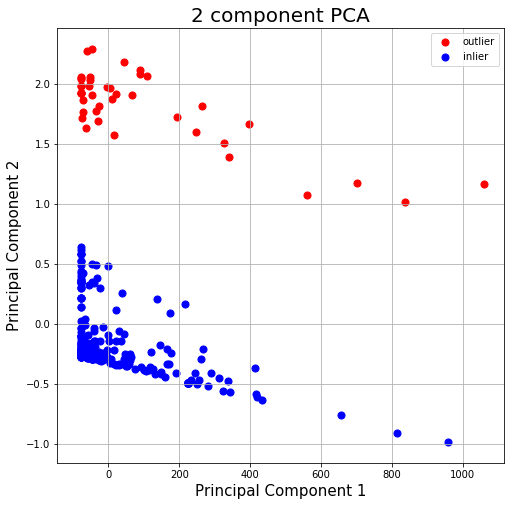

In [78]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

df_pca = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

df_pca["outlier"] = outliers_predicted

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["outlier", "inlier"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['outlier'] == -1 if target == "outlier" else df_pca['outlier'] == 1
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
               , df_pca.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [73]:
X.shape

(418, 10)

In [3]:
df2 = df.drop(columns=['outros'])

In [5]:
# df2.head()

In [46]:
df3 = df2[df2['prop_divida']<1.5]

In [47]:
df3.head()

,cnpj,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,processos,dispersao,outlier
1,225356000123,0.015050,0,0.000000,1779,0.000000,0.0,0.0,0.0,1
2,265954000207,0.003949,0,0.000000,59,0.000000,0.0,0.0,0.0,1
3,272073000302,0.070784,0,48.600000,306,0.000000,0.0,0.0,0.0,1
4,437101000124,1.399823,0,31.666667,269,0.972151,0.0,0.0,0.0,1
5,661205000118,1.249458,0,0.000000,921,1.000000,0.0,0.0,0.0,1


In [36]:
# applying Isolation Forest

In [65]:
X = df3.iloc[:, 1:]

In [67]:
X.head()

,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,processos,dispersao,outlier
1,0.015050,0,0.000000,1779,0.000000,0.0,0.0,0.0,1
2,0.003949,0,0.000000,59,0.000000,0.0,0.0,0.0,1
3,0.070784,0,48.600000,306,0.000000,0.0,0.0,0.0,1
4,1.399823,0,31.666667,269,0.972151,0.0,0.0,0.0,1
5,1.249458,0,0.000000,921,1.000000,0.0,0.0,0.0,1


In [68]:
outlier_detect =  IsolationForest(n_estimators=1000,
                                 max_samples=1000, contamination=.04, max_features=X.shape[1], random_state=1)

outlier_detect.fit(X)

outliers_predicted = outlier_detect.predict(X)

In [71]:
df3['outlier'] = outliers_predicted

In [72]:
df3.groupby('outlier').count()

,cnpj,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,processos,dispersao
outlier,,,,,,,,,
-1,20,20,20,20,20,20,20,20,20
1,471,471,471,471,471,471,471,471,471


In [73]:
df3[df3['outlier']==-1]

,cnpj,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,processos,dispersao,outlier
24,1912183000184,1.366010,13,138.833333,1211,0.907560,0.000000,0.000000,0.00,-1
46,2668113000195,0.940239,4,631.500000,1735,0.175079,0.000000,0.824921,0.00,-1
76,3847026000168,0.025850,0,418.000000,939,0.000000,0.523699,0.000000,0.00,-1
84,4247535000112,0.005866,13,973.000000,1738,0.000000,0.269671,0.000000,0.00,-1
112,5337303000118,0.139300,0,472.000000,580,0.000000,0.000000,1.000000,0.00,-1
196,8792013000152,0.293338,12,117.250000,1625,0.000000,0.000000,0.853888,0.00,-1
213,9202523000195,0.025332,1,46.000000,1107,0.000000,1.000000,0.000000,0.00,-1
238,10532480000195,0.942782,16,103.375000,1052,0.000000,0.000000,0.803167,0.00,-1
298,11223079000136,1.170740,0,15.000000,393,1.000000,0.000000,0.000000,0.25,-1
425,17214082000170,0.039981,0,30.333333,255,0.000000,1.000000,0.000000,0.00,-1


In [54]:
## trying PCA to visualize outliers

In [55]:
from sklearn.preprocessing import StandardScaler

In [75]:
features = list(X.columns)

In [76]:
features

['prop_divida',
 'quantidade_cheques',
 'tempo_medio',
 'idade_maxima',
 'credito',
 'infra',
 'processos',
 'dispersao',
 'outlier']

In [77]:
x = X.loc[:, features].values

In [78]:
x = StandardScaler().fit_transform(x)

In [80]:
X = pd.DataFrame(x)

X.columns = features

In [83]:
# features dataframe mean normalized
X.head()

,prop_divida,quantidade_cheques,tempo_medio,idade_maxima,credito,infra,processos,dispersao,outlier
0,-0.703695,-0.182295,-0.534386,2.328774,-0.389548,-0.186642,-0.202334,-0.183533,0.206065
1,-0.731222,-0.182295,-0.534386,-1.232050,-0.389548,-0.186642,-0.202334,-0.183533,0.206065
2,-0.565490,-0.182295,-0.193649,-0.720699,-0.389548,-0.186642,-0.202334,-0.183533,0.206065
3,2.730150,-0.182295,-0.312369,-0.797298,2.875683,-0.186642,-0.202334,-0.183533,0.206065
4,2.357286,-0.182295,-0.534386,0.552503,2.969221,-0.186642,-0.202334,-0.183533,0.206065


In [90]:
# reducing dimensionality to plot the data and, hoppefully, detect outliers by visualization

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

df_pca = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

df_pca.head()

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']


ax.scatter(df_pca.iloc[:, 0]
           , df_pca.iloc[:, 1]
           , s = 50)

ax.grid()


In [100]:
df_pca

,pc1,pc2
0,0.226328,0.178495
1,-1.065884,0.891861
2,-0.773521,0.626242
3,-0.205441,-3.297923
4,0.168329,-3.338622
5,-0.775642,-0.584971
6,-0.697025,0.669496
7,0.411745,-0.110297
8,-0.986786,0.842825
9,-0.316703,0.426508
